# Imports and Mounting

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx

# Misc Methods

In [2]:
def head(a: dict, i: int) -> dict:
  return dict(list(a.items())[0:i])

In [3]:
def drawColored(G: nx.Graph, coloring: dict):
  #Create drawable color_list from coloring in the right order
  color_list = []
  for node in G.nodes:
    color_list.append(coloring.get(node))

  #Draw colored graph with color_list
  nx.draw(G, node_color=color_list, with_labels=True)

In [4]:
def numberOfColors(coloring: dict) -> int:
  #Create drawable color_list from coloring in the right order
  color_list = []
  for key in coloring.keys():
    color_list.append(coloring.get(key))
  return len(set(color_list))

# Data acquisition

In [5]:
# Read the file from drive
# File can be downloaded here: https://snap.stanford.edu/data/#temporal
df = pd.read_csv('bigdata/soc-redditHyperlinks-body.tsv', delimiter="\t")

In [6]:
#Some pandas filtering of the data
dfBasic = df.drop(['POST_ID', 'TIMESTAMP', 'LINK_SENTIMENT', 'PROPERTIES'], axis=1)
dfEdges = dfBasic.drop_duplicates()

#Extract pandas data to simple lists
sources = dfEdges['SOURCE_SUBREDDIT'].tolist()
targets = dfEdges['TARGET_SUBREDDIT'].tolist()

In [7]:
#Get all vertices
vertices = list(set.union(set(sources), set(targets)))
len(vertices)

35776

In [8]:
print(len(vertices))
vertices[0:20]

35776


['customerservice',
 'boosting',
 'elderscrolls',
 'mildlydepressing',
 'animalporn',
 'pokesensor',
 'clemson',
 'agoraphobia',
 'chastity',
 'millerplanetside',
 'dota2vpgamebets',
 'sejuanimains',
 'buttontheory',
 'comandarr',
 'irstudies',
 'timetolegalize',
 'buell',
 'redditsmuseumoffilth',
 'imzy',
 'guildwars2esp']

In [9]:
#Get all edges
edges = []
for i in range (0, len(sources)):
  tuple = (sources[i], targets[i])
  edges.append(tuple)

In [10]:
#Remove inversed tuples 
#since our graph will not be directional, networkx would just ignore these tuples
from more_itertools import unique_everseen
edges = list(unique_everseen(edges, key=frozenset))

In [11]:
print(len(edges))
edges[0:20]

124330


[('leagueoflegends', 'teamredditteams'),
 ('theredlion', 'soccer'),
 ('inlandempire', 'bikela'),
 ('nfl', 'cfb'),
 ('playmygame', 'gamedev'),
 ('dogemarket', 'dogecoin'),
 ('locationbot', 'legaladvice'),
 ('indiefied', 'aww'),
 ('posthardcore', 'bestof2013'),
 ('posthardcore', 'corejerk'),
 ('gfycat', 'india'),
 ('metalcore', 'bestof2013'),
 ('metalcore', 'corejerk'),
 ('suicidewatch', 'offmychest'),
 ('dogecoin', 'novacoin'),
 ('gaming4gamers', 'fallout'),
 ('kpop', 'dota2'),
 ('airsoft', 'airsoftmarket'),
 ('circlebroke', 'childfree'),
 ('tribes', 'games')]

In [1]:
import pickle

In [2]:
edges = ['1', '2']
edges.append

In [ ]:
tabnine::config

# Networkx greedy coloring and drawing

In [12]:
#Create empty graph
G = nx.Graph()

In [13]:
#Add vertices and edges
#Note that adding edges between vertices not yet in the graph will add those vertices

#G.add_nodes_from(vertices)
G.add_edges_from(edges[0:40])

print(len(G.nodes))
print(len(G.edges))

68
40


In [14]:
#Compute coloring
coloring = nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
head(coloring, 20)

{'bestof2013': 0,
 'corejerk': 1,
 'todayilearned': 0,
 'askreddit': 1,
 'dogecoin': 0,
 'posthardcore': 2,
 'metalcore': 2,
 'funny': 0,
 'leagueoflegends': 0,
 'teamredditteams': 1,
 'theredlion': 0,
 'soccer': 1,
 'inlandempire': 0,
 'bikela': 1,
 'nfl': 0,
 'cfb': 1,
 'playmygame': 0,
 'gamedev': 1,
 'dogemarket': 1,
 'locationbot': 0}

In [15]:
numberOfColors(coloring)

3

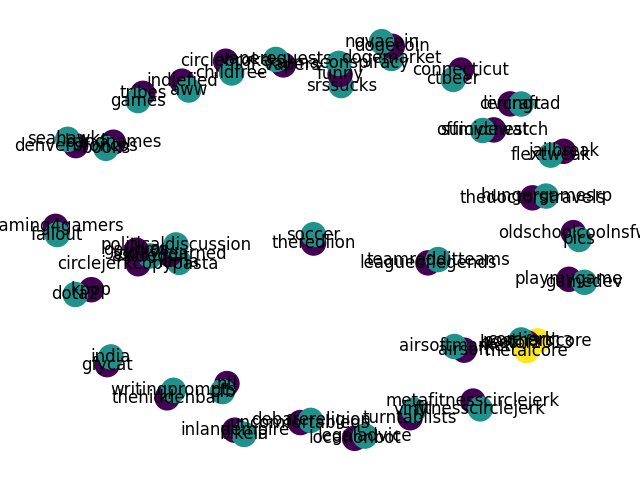

In [16]:
#Draw graph with colors
drawColored(G, coloring)

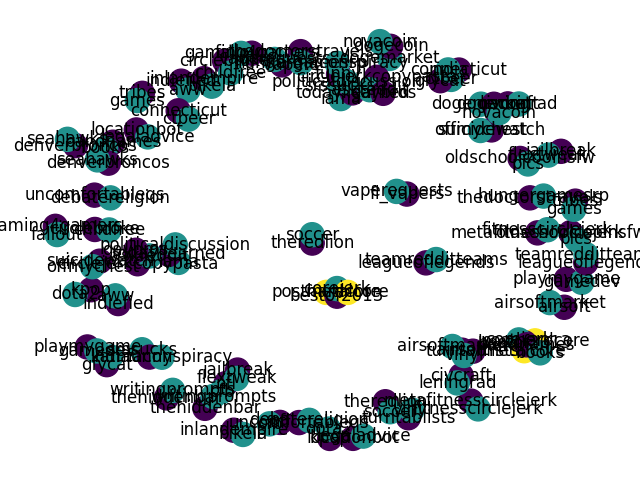

In [17]:
#Create drawable color_list from coloring in the right order
color_list = []
for node in G.nodes:
  color_list.append(coloring.get(node))

#Draw colored graph with color_list


nx.draw(G, node_color=color_list, with_labels=True)
plt.show()

plt